<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/IonQ_%EC%96%91%EC%9E%90%ED%9A%8C%EB%A1%9C_4_%EB%B2%94%EC%9A%A9%ED%9A%8C%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#if you need to install qiskit or qiskit-ionq
!python -m pip install qiskit
!python -m pip install qiskit-ionq
!python -m pip install qiskit-aer

In [ ]:
#imports
from qiskit_ionq import IonQProvider
ionq_provider = IonQProvider(token='xdNnUQmVTZyZ8ox7pHvPuU6qY5te9K8c')

from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.extensions import UnitaryGate


**Question 1: Implement the decomposition form lecture**<br>
Let's work specifically on the unitary given by:


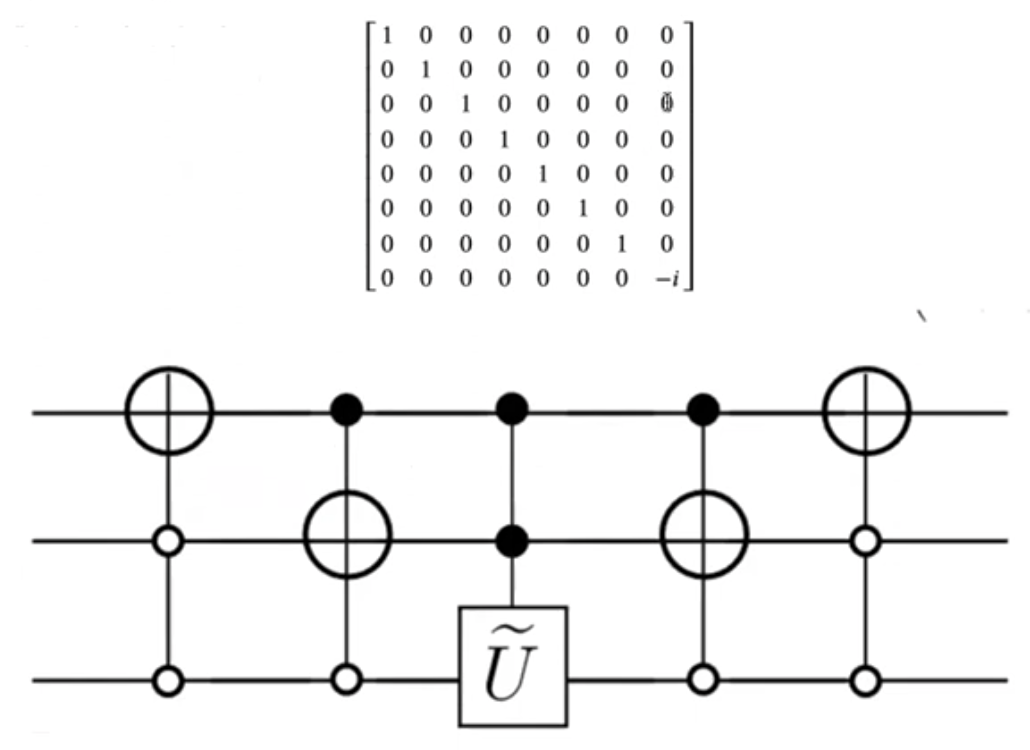

In [ ]:
# Initialize quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Toffoli with |0> activation
toffoli_circuit = QuantumCircuit(3)
toffoli_circuit.x([1, 2])
toffoli_circuit.ccx(control_qubit1=1, control_qubit2=2, target_qubit=0)
toffoli_circuit.x([1, 2]) #Undo 하기 위해
first_toffoli = toffoli_circuit.to_gate()
qc.append(first_toffoli, [2, 1, 0])

# Toffoli with first qubit activated by |1> and second qubit activated by |0>
# 이 토폴리Gate는 q0가 1일 때, 그리고 q2가 0일때 수행되는 Gate입니다.
toffoli_circ = QuantumCircuit(3)
toffoli_circ.x(2)
toffoli_circ.ccx(0, 2, 1)
toffoli_circ.x(2) #의 x를 undo하기 위해서
second_toffoli = toffoli_circ.to_gate()
qc.append(second_toffoli, [0, 2, 1])

# Submatrix
matrix = [[1, 0],
          [0, -1j]]

u_tilde = UnitaryGate(matrix, 'U')
control_u = u_tilde.control(2)
qc.append(control_u, [0, 1, 2])

# Undo
qc.append(second_toffoli, [0, 2, 1])
qc.append(first_toffoli, [2, 1, 0])
qc.draw()

In [ ]:
# Get matrix
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)

result = job.result()
matrix = result.get_unitary()
#print(matrix)
array_to_latex(matrix)

**Question 2: Decompose the Fredkin gate**<br>
The Fredkin gate is a three-qubit gate. It is the controlled swap gate: if the control qubit is activated, the two target qubits exchange their states. it is very straightforward to come up this matrix given the knowledge of its action on qubits.

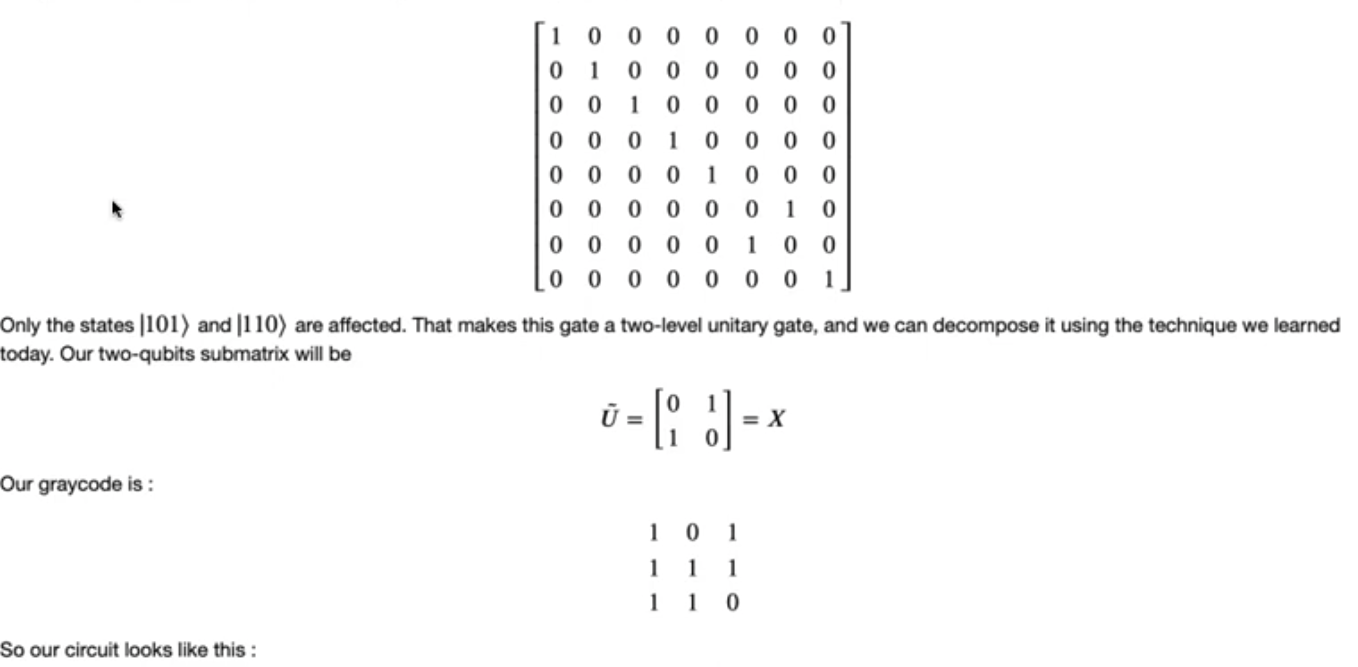

In [ ]:
# Fredkin Gate=Controlled Swap Gate
qc = QuantumCircuit(3)# Intialize circuit with 3 qubits
qc.x([0, 2]) # Initialzie in 101 state, 000하면 아무결과 않나옴
qc.ccx(0, 2, 1) # Apply the first Toffoli gate with two end qubits as control and iddle as target
qc.ccx(0, 1, 2) #111을 위해 Apply the second Toffoli gate with first two qubits as control and last as target
qc.ccx(0, 2, 1) # Undo first Toffoli gate
qc.measure_all()

# Visualize
qc.draw()

In [ ]:
# Get matrix
backend = ionq_provider.get_backend('ionq_simulator') # Choose your backend
job = execute(qc, backend) # Get the job object

# Check if job is complete
from qiskit.providers.jobstatus import JobStatus
import time
while job.status() is not JobStatus.DONE:
  print('Job status is ', job.status())
  time.sleep(2)
###while

result = job.result() # get result object
counts = result.get_counts() # get the counts dictionary
plot_histogram(counts) #plot the histogram of the counts
#Qiskit은 순서를 반대로 보이기 때문에 011 --> 110 임

In [ ]:
plot_histogram(execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts())